In [2]:
import numpy as np
import sys
from os.path import join
sys.path.append('../fluidity-master/python/')
import vtktools

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
data_path = "../data/small3DLSBU/"

In [4]:
def load_data(ts_0,ts_end):
    data_dict = {}
    for ts in range(ts_0,ts_end+1):
        try:
            data_dict[ts] = vtktools.vtu(join(data_path,'LSBU_'+ str(ts)+'.vtu'))
        except:
            print('Can\'t open the file \'' + str(join(data_path,'LSBU_'+ str(ts)+'.vtu'))+ '\'')
    return data_dict
    
    

In [14]:
loaded =load_data(100,104)


Can't open the file '../data/small3DLSBU/LSBU_104.vtu'


In [7]:
field_names = loaded[101].GetFieldNames()


In [28]:
loaded.keys[0]

100

In [43]:
for i, c in enumerate(loaded):
    print(i,c)

0 100
1 101
2 102
3 103


In [36]:
np.zeros((5,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
loaded[101].GetLocations().shape[0]

100040

In [29]:
loaded[101].GetField('Pressure').shape

(100040, 1)

In [21]:
def spatial_covariance(vtk_file, field):
    field_data = vtk_file.GetField(field)
    

In [22]:
cov = spatial_covariance(loaded[101], 'Tracer')


In [23]:
field_data = loaded[101].GetField('Pressure')
cov_test = np.cov(field_data)

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [10]:
loaded.clear()

In [11]:
loaded

{}

In [5]:
cropped = loaded[101].Crop(min_x= -50, max_x= 50,
                           min_y= -50, max_y= 50,
                           min_z=0, max_z=50
                          )

In [6]:
loaded[101].GetLocations().size

77373

In [7]:
cov = np.cov(loaded[101].GetField('Pressure'))

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [8]:
cov.size

665175681

In [9]:
loaded[101].GetLocations()[0]

array([-32.90781021,  22.37088585,  21.72973824])

In [10]:
loaded[101].GetPointPoints(0)

array([    0,     1,     2,     3,   227,  5731, 22594, 24328,   299,
       23595,    13,  9903,   753,   338,   244,   152,   153,   125,
          31])

In [11]:
loaded[101].GetLocations()[165]

array([-49.7108345 , -25.0608387 ,   8.84130859])

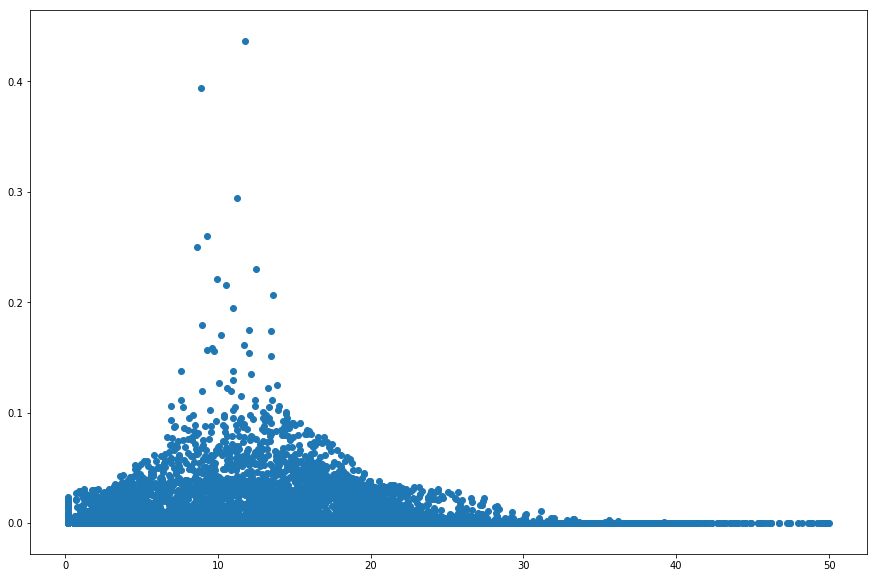

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(loaded[101].GetLocations()[:,2],loaded[101].GetField('Tracer'))

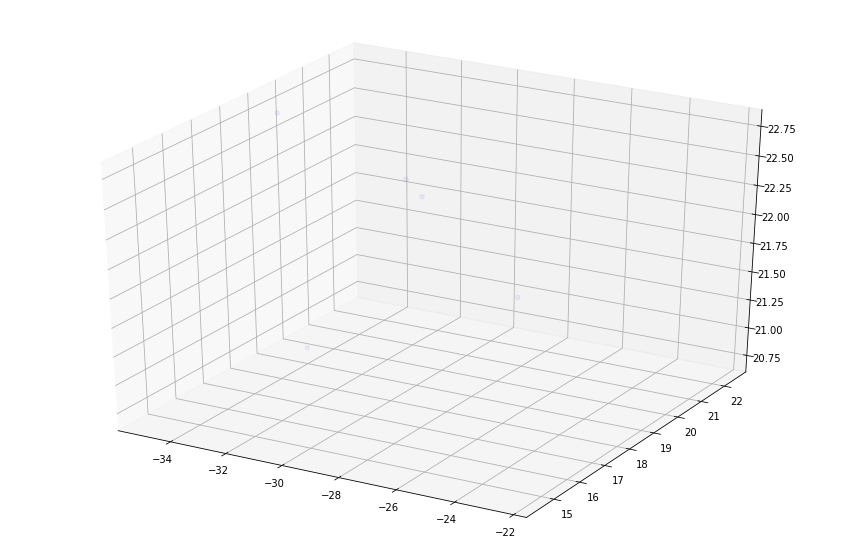

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
positions = loaded[101].GetLocations()[0:5,:]
field = loaded[101].GetField('Tracer')[0:5,:]
color = ['r' if i > 0.05  else 'b' for i in field  ]

ax.scatter(positions[:,0],positions[:,1],positions[:,2],c= color,alpha=0.05)

In [39]:
np.cov(field)

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [40]:
np.cov(field*10**15)

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [15]:
cov = np.inner ((field - field.mean()),field - field.mean())/(field.size - 1 )


In [ ]:
m = field


w = f * a
v1 = np.sum(w)
v2 = np.sum(w * a)
m -= np.sum(m * w, axis=1, keepdims=True) / v1
cov = np.dot(m * w, m.T) * v1 / (v1**2 - ddof * v2)

In [60]:
x = [-2.1, -1,  4.3]
y = np.array([3,  1.1,  0.12]).T
X = np.stack((x, y), axis=0)

print(np.cov(field.T,field.T))



[[2.33570579e-15 2.33570579e-15]
 [2.33570579e-15 2.33570579e-15]]


array([[3.  , 1.1 , 0.12]])

In [ ]:
loaded